# <span style='color:white'> <center>Portafolios de inversión con Python</center> </span>

## Theory
1. Metricas para el Analisis de Activos
2. Metricas para el Analisis del Portafolio
3. Portafolio de H. Markowitz (Riesgo vs Rendimiento)
4. Frontera Eficiente
5. El modelo CAPM (Capital Asset Price Model)
6. Beta y Sharp Ratio

### 1. Metricas para el Analisis de Activos
$$
\textbf{Rendimiento esperado del activo:}
$$

$$
\bar{r} = \frac{1}{n} \sum_{i=1}^{n} r_i
$$
$$
\textbf{Varianza del activo:}
$$
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2
$$
$$
\textbf{Riesgo del activo:}
$$
$$\sigma = \sqrt{\sigma^2}
$$
$$
\textbf{Beta de mercado:}
$$
$$\beta = \frac{\sigma_{A,m}}{\sigma_m}
$$


In [140]:
# To display formulas within a code cell
from IPython.display import display, Math
display(Math(r"\bar{r} = \frac{1}{n} \sum_{i=1}^{n} r_i"))

<IPython.core.display.Math object>

### 2. Metricas para el Analisis de Portafolio
$$
\textbf{Rendimiento esperado del Portafolio:}
$$

$$
E(r_p) = \sum_{i=1}^{n} w_i \cdot \bar{r}_i 
\quad \textbf{  donde} \quad
\sum_{i=1}^{n} w_i = 1
$$
$$
\textbf{Varianza del Portafolio:}
$$
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{i,j}
\quad \textbf{  donde} \quad
\sigma_{i,j} \quad \textbf{= Covarianza} \quad
$$
$$
\textbf{Riesgo del Portafolio:}
$$
$$
\sigma_p = \sqrt{\sigma_p^2}
$$


### 3. Portafolio de Markowitz (Riesgo vs Rendimiento)

Maximizar Rendimientos buscando el menor Riesgo Posible

### 4. Frontera Eficiente

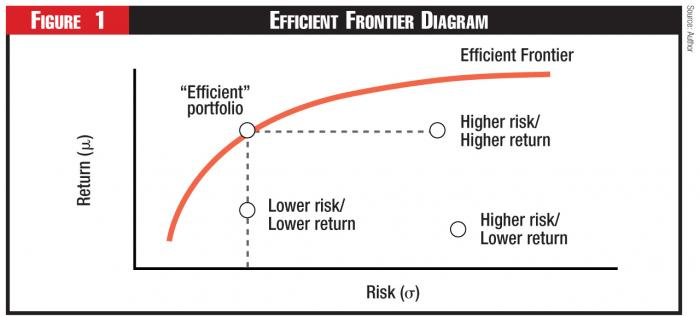

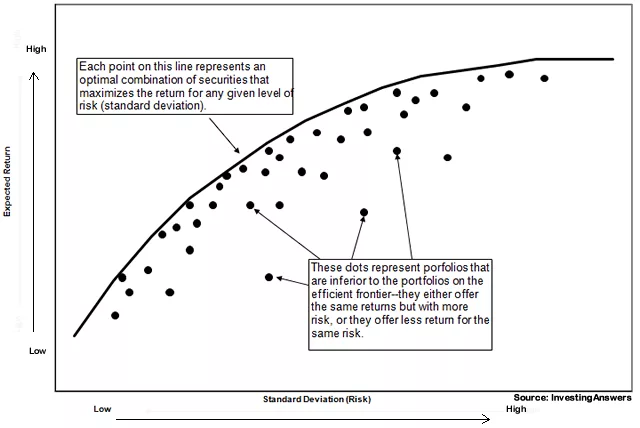

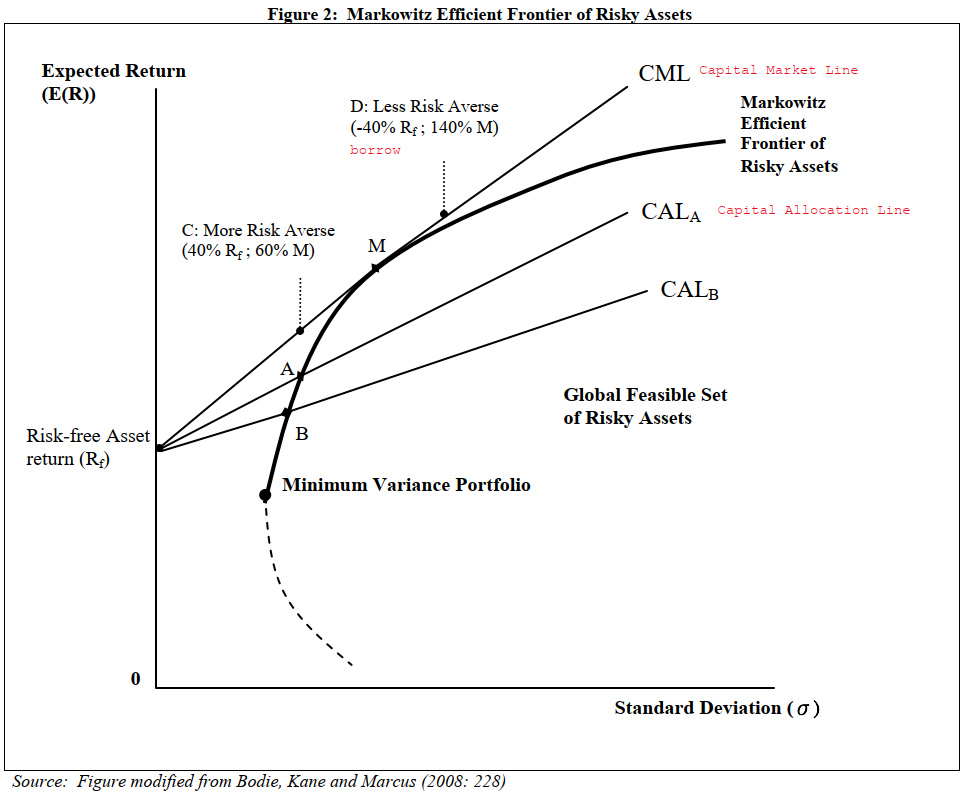

### 5. El modelo CAPM (Capital Asset Price Model) 

Estimar el precio de un activo con base en el riesgo del mercado

$$
R_i = R_f + \beta_i \cdot (R_m - R_f)
$$

$R_i$: Asset Return

$R_f$: Risk-free Asset Return (Treasuries, CETES, etc.)

$\beta_i$: Asset Return variance w.r.t. Market variance

$R_m$: Market Return

$R_m - R_f$: se traduce como la compensación que un inversionista recibe por el riesgo aceptado (también conocido como riesgo de mercado)

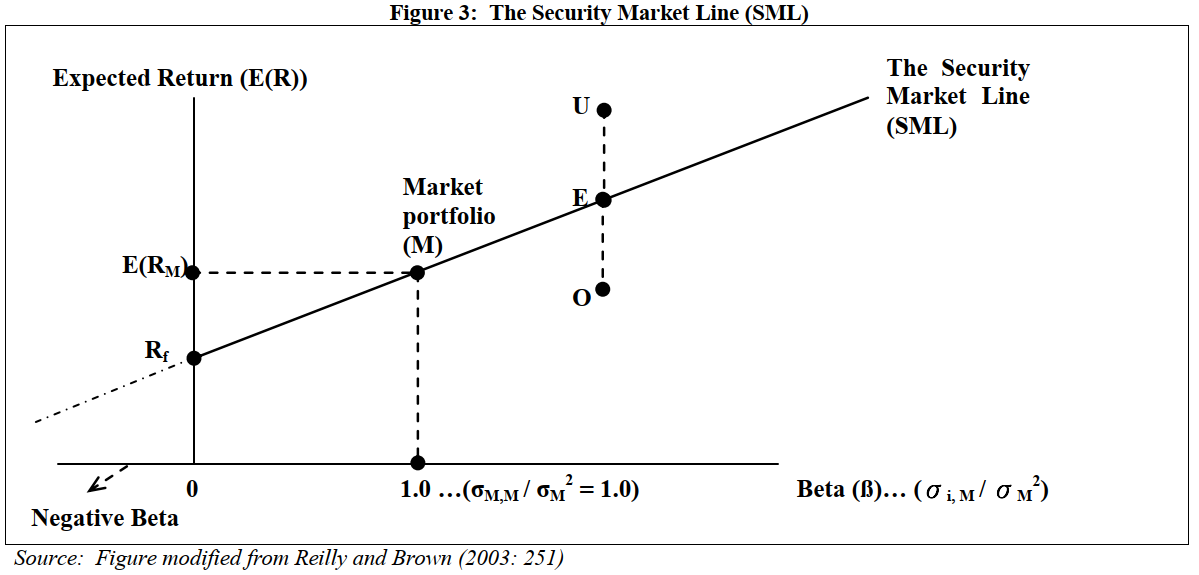

Descargaremos la información de un portafolio compuesto por 5 acciones. Vamos a utilizar Apple, Nike, Google y Micrisoft.\
Utilizaremos una ventana de tiempo del 01/01/2018 a dia de hoy.

In [141]:
#Si no tenemos instalada la libreria yfinance, ejecutar el siguiente comando
#!pip install yfinance

Como primer paso, debemos importas las librerias necesarias para el análisis.

In [142]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

Posteriormente, en un Data Frame vamos a almacenar la información de los precios de cierre de las 5 acciones seleccionadas.

In [159]:
tickers = ['AAPL', 'NKE', 'GOOGL', 'MSFT']

portafolio = pd.DataFrame()

for t in tickers:
    portafolio[t] = yf.download(t, start = '2018-01-01', end = '2024-10-22')['Close'] #Close Price

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Visualizamos el contenido del Data Frame que acabamos de construir.

In [160]:
portafolio

,AAPL,NKE,GOOGL,MSFT
Date,,,,
2018-01-02,40.479839,58.355362,53.466679,79.474159
2018-01-03,40.472790,58.346165,54.378876,79.844040
2018-01-04,40.660782,58.309395,54.590103,80.546776
2018-01-05,41.123722,58.805740,55.313980,81.545403
2018-01-08,40.970985,59.329636,55.509274,81.628601
...,...,...,...,...
2024-10-15,233.336456,81.291542,165.270599,417.067230
2024-10-16,231.270996,83.093185,164.970932,414.457703
2024-10-17,231.640182,82.558624,162.743469,415.055328


Realizamos un gráfico de serie para comparar de manera visual el comportamiento de las series importadas.

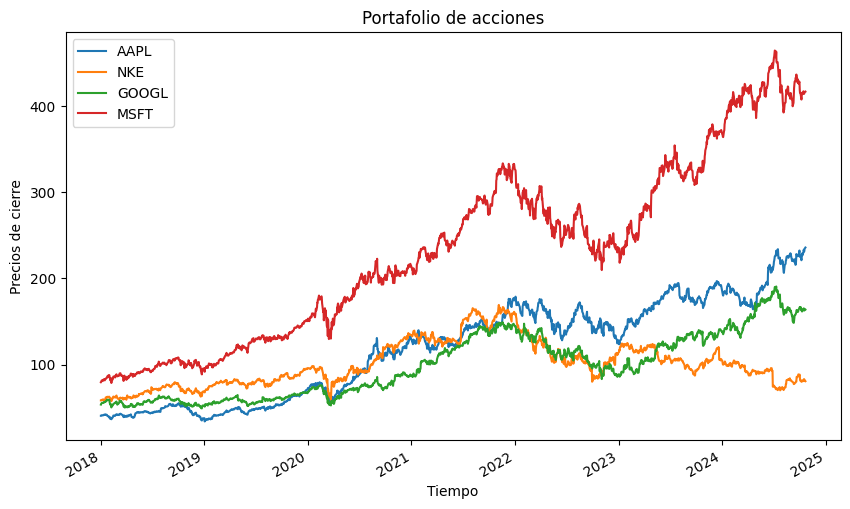

In [161]:
portafolio.plot(figsize = (10,6))
plt.title('Portafolio de acciones')
plt.xlabel('Tiempo')
plt.ylabel('Precios de cierre')
plt.show()

## Normalizar a 100

Cuando se analiza en conjunto los precios de acciones, es común tener precios que se desenvuelven a diferentes magnitudes. En estos casos, se realiza una técnica conocida como "Normalizar series a 100", la cual consiste en dividir todos los registros de la serie de tiempo entre el primer registro.


$$
\frac {P_t}{P_0} * 100
$$

Esto forzará a que todas las series comiencen desde un mismo punto en común (100). De esta manera, podemos comparar el crecimiento/decremento en los precios de acciones que no tengan necesariamente precios en los mismos rangos.

**Normalizar** precios de diferentes **magnitudes** dividiendo entre el primer registro. Todos los precios parten del mismo punto.

In [162]:
portafolio_norm = (portafolio / portafolio.iloc[0] * 100)
portafolio_norm

,AAPL,NKE,GOOGL,MSFT
Date,,,,
2018-01-02,100.000000,100.000000,100.000000,100.000000
2018-01-03,99.982585,99.984239,101.706104,100.465410
2018-01-04,100.446994,99.921229,102.101168,101.349642
2018-01-05,101.590626,100.771786,103.455052,102.606185
2018-01-08,101.213310,101.669553,103.820314,102.710871
...,...,...,...,...
2024-10-15,576.426340,139.304323,309.109531,524.783444
2024-10-16,571.323898,142.391689,308.549056,521.499952
2024-10-17,572.235924,141.475644,304.382979,522.251927


Volvemos a realizar nuestro gráfico ahora con las series normalizadas a 100.

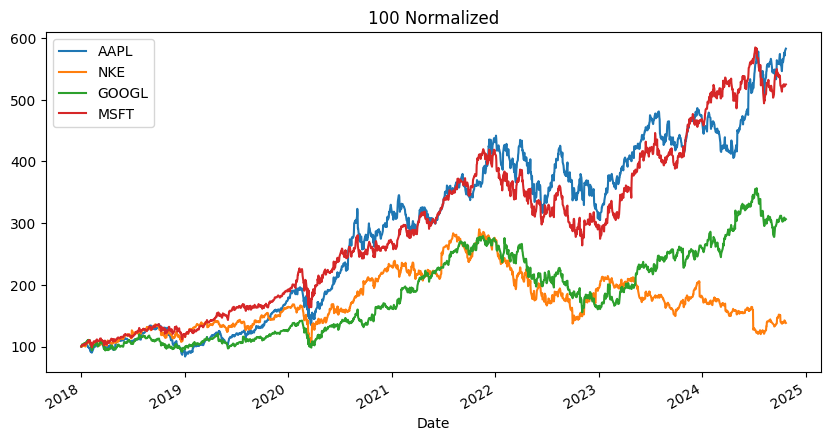

In [163]:
portafolio_norm.plot(figsize=(10,5))
plt.title('100 Normalized')
plt.show()

## Rendimiento de un activo

Cuando se analiza el comportamiento de un activo, es de gran utilidad analizar el comportamiento de los rendimientos generados a través del tiempo.

Vamos a seleccionar un activo y estudiamos sus rendimientos.

In [164]:
MSFT = portafolio['MSFT']

A partir del método **shift** obtenemos el rendimiento con la siguiente fórmula:
$$
return = \frac {P_t}{P_{t-1}} -1
$$

In [165]:
MSFT_rendimientos = (MSFT / MSFT.shift(1))-1

In [166]:
MSFT_rendimientos

Date
2018-01-02         NaN
2018-01-03    0.004654
2018-01-04    0.008801
2018-01-05    0.012398
2018-01-08    0.001020
                ...   
2024-10-15   -0.000954
2024-10-16   -0.006257
2024-10-17    0.001442
2024-10-18    0.003455
2024-10-21    0.001483
Name: MSFT, Length: 1712, dtype: float64

Una vez obtenido la serie de rendimientos generados por el activo, realizamos un gráfico de serie con los rendimientos.

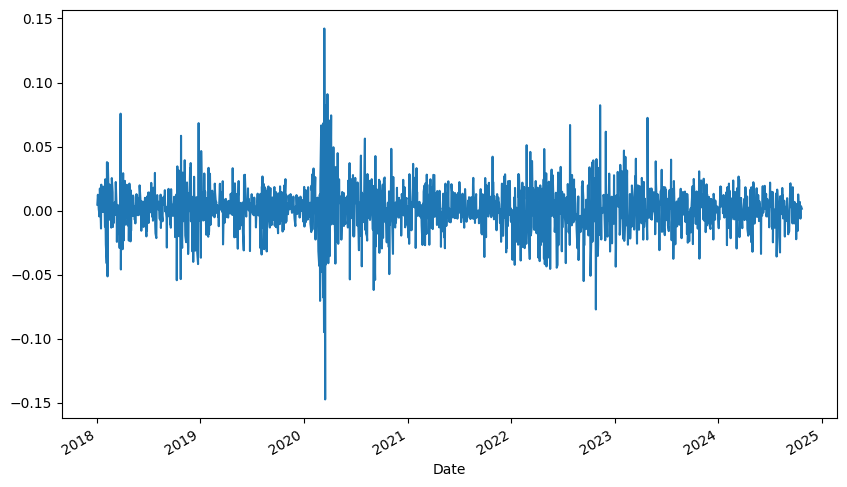

In [167]:
MSFT_rendimientos.plot(figsize = (10,6))
plt.show()

Realizamos un gráfico de barras (histograma).

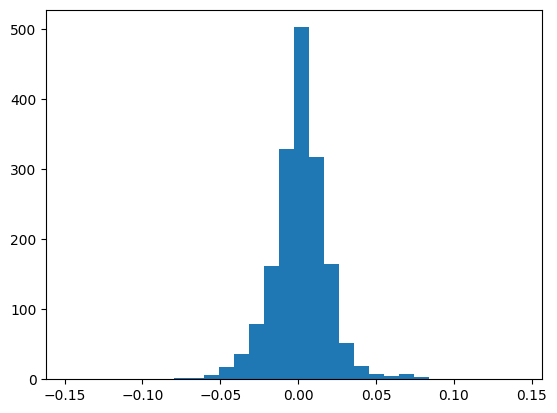

In [168]:
plt.hist(MSFT_rendimientos, bins = 30)
plt.show()

Note que la distribución de los rendimientos es muy parecido a una distribución normal. Vamos a graficarlo junta a una pdf normal.

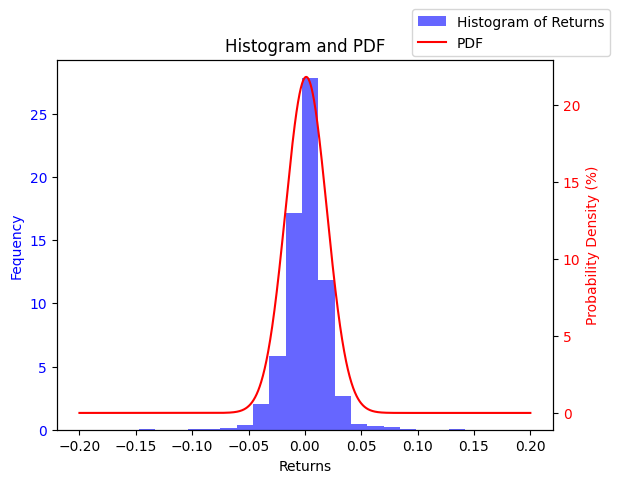

In [169]:
mu = np.mean(MSFT_rendimientos)
std = np.std(MSFT_rendimientos)

fig, ax1 = plt.subplots()

#histogram
ax1.hist(MSFT_rendimientos, bins = 20, density=True, alpha=0.6, color='blue', label='Histogram of Returns')

ax1.set_ylabel('Fequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

x = np.linspace(-0.2,0.2,1800)
p = norm.pdf(x, mu, std)

ax2.plot(x, p, color='red', label='PDF')
ax1.set_xlabel('Returns')
ax2.set_ylabel('Probability Density (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=fig.transFigure)



#plt.xlabel('Returns')
#plt.ylabel('Density')
plt.title('Histogram and PDF')
plt.show()



Obtenemos el rendimiento promedio anual. Se multiplica por 250 porque son los dias de negocio que se tienen a lo largo de un año. 

In [170]:
MSFT_rend_promedio = MSFT_rendimientos.mean() * 250
MSFT_rend_promedio

0.28418063084355255

## Riesgo de un activo

Además de analizar el rendimiento que puede tener un activo en un periodo de tiempo, se debe tener una medida de variabilidad o volatilidad de este. A partir de esta medición, se podrá conocer si el activo representa un riesgo o no para el inversionista.

$$
risk = \sqrt{\frac {\sum(r - \bar{r})^2}{n-1}}
$$

Vamos a elegir dos acciones de nuestro portafolio.

In [171]:
MSFT = portafolio['MSFT']
GOOGLE = portafolio['GOOGL']

Obtenemos sus rendimientos.

In [172]:
MSFT_rendimientos = (MSFT / MSFT.shift(1)) -1
GOOGLE_rendimientos = (GOOGLE / GOOGLE.shift(1)) -1

Obtemenos rendimiento promedio anual.

In [173]:
print(MSFT_rendimientos.mean() * 250)
print(GOOGLE_rendimientos.mean() * 250)

0.28418063084355255
0.2106502411030472


Obtenemos el riesgo promedio anual.

In [174]:
print(MSFT_rendimientos.std() * 250 ** 0.5)
print(GOOGLE_rendimientos.std() * 250 ** 0.5)

0.2892316360285528
0.30626610682733135


## Rendimiento de un portafolio

Obtenemos el rendimiento ahora de un portafolio de acciones.

El método shift permite desfasar un DataFrame el número de renglones que deseemos, de acuerdo a la columna de indices.

In [176]:
portafolio.head(8)

,AAPL,NKE,GOOGL,MSFT
Date,,,,
2018-01-02,40.479839,58.355362,53.466679,79.474159
2018-01-03,40.472790,58.346165,54.378876,79.844040
2018-01-04,40.660782,58.309395,54.590103,80.546776
2018-01-05,41.123722,58.805740,55.313980,81.545403
2018-01-08,40.970985,59.329636,55.509274,81.628601
2018-01-09,40.966278,58.906837,55.438530,81.573143
2018-01-10,40.956871,59.026314,55.306507,81.203270
2018-01-11,41.189518,59.090664,55.401665,81.443649


A partir del método **shift** obtenemos el rendimiento con la siguiente fórmula:
$$
return = \frac {P_t}{P_{t-1}} -1
$$

In [178]:
rendimientos = (portafolio / portafolio.shift(1)) - 1
rendimientos

,AAPL,NKE,GOOGL,MSFT
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,-0.000158,0.017061,0.004654
2018-01-04,0.004645,-0.000630,0.003884,0.008801
2018-01-05,0.011385,0.008512,0.013260,0.012398
2018-01-08,-0.003714,0.008909,0.003531,0.001020
...,...,...,...,...
2024-10-15,0.011025,0.006373,0.003031,-0.000954
2024-10-16,-0.008852,0.022163,-0.001813,-0.006257
2024-10-17,0.001596,-0.006433,-0.013502,0.001442


Asignamos un vector de pesos, es decir, el porcentaje de inversión en cada activo. \
Recordemos que la suma de los pesos nos debe dar un total de 1.

In [183]:
pesos = [0.25, 0.25, 0.25, 0.25]

Obtenemos el rendimiento promedio anual de cada acción. Recordemos que no es correcto multiplicar por 250 porque los dias de negocio al año son entre 250 y 251 (no contando dias no comerciales como fin de semana o dias festivos)


In [182]:
rendimientos_anuales = rendimientos.mean() * 250
rendimientos_anuales

AAPL     0.304930
NKE      0.100420
GOOGL    0.210650
MSFT     0.284181
dtype: float64

A través del método **dot**, obtenemos el producto de las matrices rendimiento y pesos.

In [185]:
np.dot(rendimientos_anuales, pesos)

0.22504527649477618

## Riesgo de un portafolio

Supongamos que decidimos invertir la misma cantidad de dinero en las 5 compañias que componen nuestro portafolio.

In [186]:
pesos = np.array([0.25,0.25,0.25,0.25])

Obtenemos la varianza del portafolio.

In [187]:
rendimientos.cov()

,AAPL,NKE,GOOGL,MSFT
AAPL,0.000378,0.000194,0.000245,0.000260
NKE,0.000194,0.000423,0.000184,0.000187
GOOGL,0.000245,0.000184,0.000375,0.000267
MSFT,0.000260,0.000187,0.000267,0.000335


In [189]:
var_portafolio = np.dot(pesos.T, np.dot(rendimientos.cov() * 250, pesos))
var_portafolio

0.06537535998192118

Obtenemos el riesgo del portafolio.

In [192]:
riesgo_portafolio = (var_portafolio) ** 0.5
riesgo_portafolio

0.25568605746485507

## Frontera Eficiente

La frontera eficiente nos permitirá analizar de manera gráfica las combinaciones de portafolios que nos brindan el mayor rendimiento asumiendo el mismo riesgo que otros portafolios.

Obtenemos la matriz de covarianzas entre los activos.

Obtenemos la matriz de correlación.

Guardamos el numero de activos dentro de una variable.

Recordemos las formulas para obtener el rendimiento, varianza y riesgo esperado del portafolio.

Construimos diferentes portafolios (con pesos asignados de manera aleatoria) para graficar la froneta eficiente.

## Portafolio de mínima varianza

A partir de esta teoria de riesgo-rendimiento, podemos utilizar los módulos de optimización para encontrar la cartera que me represente el menor riesgo posible.  

In [ ]:
tickers = ['NVDA','^IXIC']  #'^IXIC' es el indice del NASDAQ

portafolio = pd.DataFrame()

for t in tickers:
    portafolio[t] = yf.download(t, start = '2019-10-22',end = '2024-10-22')['Close']

Obtenemos los rendimientos de nuestro activo y del índice de mercado.

In [ ]:
rendimientos_2 = (portafolio / portafolio.shift(1))-1

In [ ]:
rendimientos_2.head(5)

Para obtener la beta, necesitamos tanto la covarianza entre los rendimientos del activo y el indice, como la varianza de los rendimientos del indice.

In [ ]:
#matriz de varianzas y covarianzas. Esto de manera anual.
cov = rendimientos_2.cov()*250
cov

In [ ]:
#Covarianza activo y mercado
cov_con_mercado = cov.iloc[0,1]
cov_con_mercado

In [ ]:
#Varianza del mercado
var_mercado = rendimientos_2['^IXIC'].var()*250
var_mercado

Calculamos la beta.

In [ ]:
WMT_beta = cov_con_mercado / var_mercado
print(round(WMT_beta,2))

Validamos nuestro calculo con la información obtenida directamente de Yahoo finance.

In [ ]:
#yf.Ticker('NVDA').info.get('beta')
activo = yf.Ticker('NVDA')
info = activo.info
beta = info.get('beta')
beta

$$
r_{i} = r_{f} + \beta_{im}*(r_{m}-r_{f})
$$

donde:\
$r_i = $ rendimiento esperado del activo\
$r_f = $ rendimiento activo libre de riesgo\
$\beta_{im} = $beta del activo\
$r_m = $rendimiento del mercado

rendimiento libre de riesgo: rendimiento minimo que un inversor estaria dispuesto a aceptar \
la diferencia entre rm y rf es la compensaciòn que un inversor recibe por el riesgo aceptado (equity risk premium)\
La beta mide la cantidad de riesgo que conlleva un valor respecto al mercado